In [40]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
# Stemming
from nltk.stem import PorterStemmer
#Lematization
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
from textblob import TextBlob
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [7]:
#get sentence and word level tokens
text="This is a class review. I found the professor boring and the material useless. You shouldn't take this class."
text_sentence = sent_tokenize(text)
text_word = word_tokenize(text)
print(text_sentence)
print(text_word)

['This is a class review.', 'I found the professor boring and the material useless.', "You shouldn't take this class."]
['This', 'is', 'a', 'class', 'review', '.', 'I', 'found', 'the', 'professor', 'boring', 'and', 'the', 'material', 'useless', '.', 'You', 'should', "n't", 'take', 'this', 'class', '.']


<FreqDist with 19 samples and 23 outcomes>
[('.', 3), ('class', 2)]


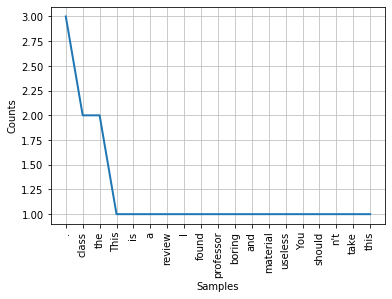

In [17]:
#plot frequency of words
fdist = FreqDist(text_word)
print(fdist)
print(fdist.most_common(2))
fdist.plot(30,cumulative=False)
plt.show()

In [33]:
#remove stopwords
filtered_sent = []
stop_words=set(stopwords.words("english"))
for w in text_word:
    if w not in stop_words:
        filtered_sent.append(w)
print(text_word)
print(filtered_sent)

['This', 'is', 'a', 'class', 'review', '.', 'I', 'found', 'the', 'professor', 'boring', 'and', 'the', 'material', 'useless', '.', 'You', 'should', "n't", 'take', 'this', 'class', '.']
['This', 'class', 'review', '.', 'I', 'found', 'professor', 'boring', 'material', 'useless', '.', 'You', "n't", 'take', 'class', '.']


In [27]:
#get stemmed words
ps = PorterStemmer()

stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print(filtered_sent)
print(stemmed_words)

['This', 'class', 'review', '.', 'I', 'found', 'professor', 'boring', 'material', 'useless', '.', 'You', "n't", 'take', 'class', '.']
['thi', 'class', 'review', '.', 'I', 'found', 'professor', 'bore', 'materi', 'useless', '.', 'you', "n't", 'take', 'class', '.']


In [32]:
#Compare lemmatized to stemmed and filtered
lm = WordNetLemmatizer()

lemm_words = []
for w in filtered_sent:
    lemm_words.append(lm.lemmatize(w, "v"))
  

print(filtered_sent)
print(stemmed_words)
print(lemm_words)

['This', 'class', 'review', '.', 'I', 'found', 'professor', 'boring', 'material', 'useless', '.', 'You', "n't", 'take', 'class', '.']
['thi', 'class', 'review', '.', 'I', 'found', 'professor', 'bore', 'materi', 'useless', '.', 'you', "n't", 'take', 'class', '.']
['This', 'class', 'review', '.', 'I', 'find', 'professor', 'bore', 'material', 'useless', '.', 'You', "n't", 'take', 'class', '.']


In [36]:
#get POS tags
nltk.pos_tag(filtered_sent)

[('This', 'DT'),
 ('class', 'NN'),
 ('review', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('found', 'VBD'),
 ('professor', 'RB'),
 ('boring', 'JJ'),
 ('material', 'NN'),
 ('useless', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ("n't", 'RB'),
 ('take', 'VB'),
 ('class', 'NN'),
 ('.', '.')]

In [44]:
#Use textblob to get sentiment of strings!
blob = TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=-0.75, subjectivity=0.6)
